In [1]:
import numpy as np
import pandas as pd
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
def sort_db_value(db,value,asc=False):
    return db.sort_values(by = value, ascending = asc)

In [3]:
irs_db = pd.read_csv('Data/eo1.csv')

In [15]:
irs_db.head(5)

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,3514
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN


In [6]:
mask = irs_db["DEDUCTIBILITY"] == 1

In [7]:
irs_db = irs_db[mask]

In [28]:
irs_db.sort_values(by = "GROUP", ascending = False).head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
119093,222789192,MAINEGENERAL HEALTH,% JEREMY STORER,35 MEDICAL CENTER PKWY,AUGUSTA,ME,04330-8160,9706,3,9,...,8,8,1,0,6,NaN,NaN,NaN,P70Z,NaN
182409,455473855,MAINEGENRAL MEDICAL CENTER,% MAINEGENERAL MEDICAL CENTER SOLE,35 MEDICAL CENTER PKWY,AUGUSTA,ME,04330-8160,9706,3,9,...,0,0,1,0,6,NaN,NaN,NaN,NaN,KENNEBEC RISK LLC
2946,10524384,MAINEGENERAL HEALTH,% ALAN SANFORD,35 MEDICAL CENTER PKWY,AUGUSTA,ME,04330-8160,9706,3,9,...,7,8,2,0,6,NaN,NaN,NaN,E90,MAINEGENERAL COMMUNITY CARE
24631,43369649,MAINEGENERAL HEALTH,NaN,35 MEDICAL CENTER PKWY,AUGUSTA,ME,04330-8160,9706,3,6,...,8,8,1,0,6,32158014.0,11140754.0,10708435.0,E22,NaN
168423,320265031,MAINEGENERAL HEALTH,% JEREMY STORER,35 MEDICAL CENTER PKWY,AUGUSTA,ME,04330-8160,9706,3,9,...,9,9,3,0,6,641376200.0,557182635.0,524087029.0,NaN,GROUP RETURN


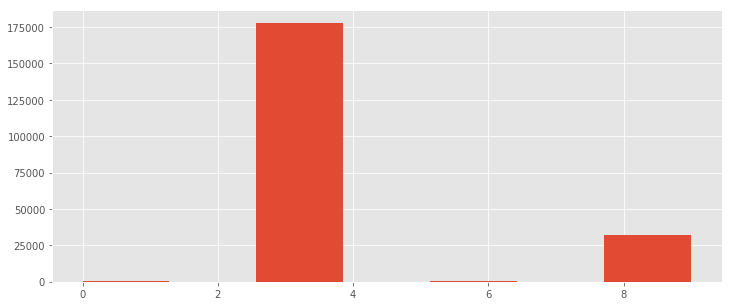

In [24]:
irs_db["AFFILIATION"].hist(figsize = (12,5), bins = 7) ;

In [25]:
irs_db.sort_values(by = "FOUNDATION", ascending = True).head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
136652,237092938,AMERICAN LEGION AUXILIARY,% PAULETTE BOCASH,1272 MAIN ST,SHELDON,VT,05483-9739,964,19,9,...,0,0,2,0,12,0.0,0.0,0.0,NaN,88 SHELDON SPRINGS
134266,232433600,ANCIENT ORDER OF HIBERNIANS LADIES,% ELLE MCCRANE,2109 HOMECREST AVE,BROOKLYN,NY,11229-4111,0,10,3,...,0,0,2,0,12,0.0,0.0,0.0,NaN,RAE DISPALDO
40730,61450082,SONS OF ITALY IN AMERICA,% DAN CASTRICANE,PO BOX 2021,TUXEDO,NY,10987-0000,3610,8,9,...,3,3,2,0,9,30957.0,25894.0,25894.0,NaN,1353 HENRY H ROGERS-CABRINI
115974,222537290,ST JOHNSBURY CHAPT 1021 WOMEN OF THE MOOSE,% SUSAN M MACKAY,PO BOX 262,ST JOHNSBURY,VT,05819-0262,2,8,9,...,0,0,2,0,4,0.0,0.0,0.0,NaN,1021
154065,264469004,ORDER OF AHEPA,% EMMANUEL MOSHOVOS,14 B HARTUNG PLACE,OLD LYME,CT,06371-2230,1466,8,9,...,0,0,2,0,12,0.0,0.0,0.0,NaN,7 DISTRICT


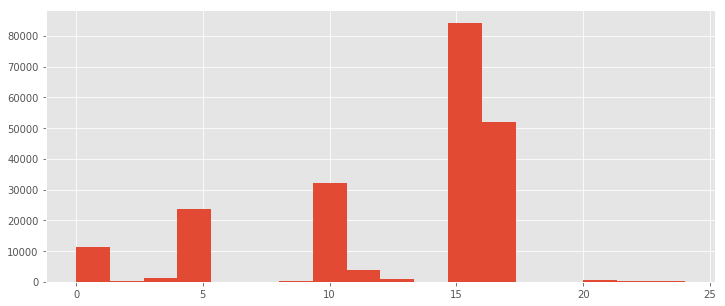

In [26]:
irs_db["FOUNDATION"].hist(figsize = (12,5), bins = 18) ;

In [27]:
sort_db_value(irs_db,"SUBSECTION", False).head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
28488,46024391,ROBERT J EDWARDS TRUST U/W,% N E MERCHANTS NATL BANK,PO BOX 1802,PROVIDENCE,RI,02901-1802,0,92,3,...,4,4,0,1,12,479487.0,174899.0,NaN,NaN,NaN
75710,136084412,RODGERS & HAMMERSTEIN FOUNDATION,NaN,229 W 28TH ST FL 11,NEW YORK,NY,10001-5915,0,92,3,...,2,3,0,1,12,21512.0,32793.0,NaN,NaN,NaN
28347,46018681,DANIEL B WESSON TR 59-7057006,NaN,PO BOX 1802,PROVIDENCE,RI,02901-1802,0,92,3,...,5,4,0,1,12,762835.0,283086.0,NaN,NaN,NaN
12934,36004154,MOUNT LAUREL FOUNDATION INC,% JOHN ALEXOPOULOS,PO BOX 915,MANCHESTER,VT,05254-0915,0,92,3,...,5,4,0,1,6,692482.0,497100.0,NaN,NaN,NaN
43667,66026019,FULTON FUND,% FLEET PRIVATE CLIENTS GROUP,PO BOX 1802,PROVIDENCE,RI,02901-1802,0,92,3,...,5,4,0,1,6,728851.0,284339.0,NaN,NaN,NaN


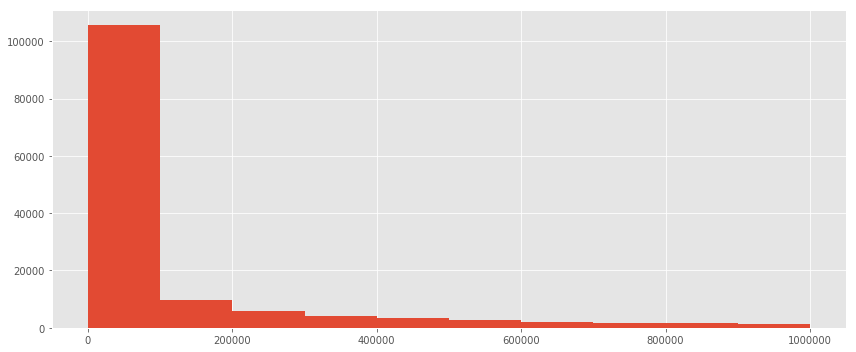

In [22]:
irs_db['ASSET_AMT'].hist(figsize = (12,5), range=[0, 1000000]) ;
plt.tight_layout()

In [35]:
sort_db_value(irs_db,"ASSET_CD", False).head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
115550,222520918,COLTON FAMLIY FOUNDATION,% STUART COLTON,232 HARTSHORN DR,SHORT HILLS,NJ,07078-1914,0,3,3,...,9,9,0,1,11,56060290.0,61747686.0,NaN,NaN,NaN
157621,271414646,CLINTON HEALTH ACCESS INITIATIVE INC,% JULIE B FEDER,383 DORCHESTER AVE S400,BOSTON,MA,02127-2422,0,3,3,...,9,9,1,0,12,82858248.0,133248928.0,127550776.0,Q33,NaN
84787,150533561,HARTWICK COLLEGE,NaN,1 HARTWICK DR,ONEONTA,NY,13820-4000,0,3,3,...,9,9,1,0,6,156639158.0,90077682.0,72988713.0,B420,NaN
157585,271401401,GRACE FARMS FOUNDATION,% TOM MEDICO,365 LUKES WOOD RD,NEW CANAAN,CT,06840-0000,0,3,3,...,9,7,0,1,12,134954937.0,8675300.0,NaN,T23,NaN
163968,276377439,TANSY CHARITABLE FOUNDATION,% NEIL PIROZZI,1166 AVENUE OF THE AMERICAS 9TH FL,NEW YORK,NY,10036-2750,0,3,3,...,9,9,0,1,12,217197729.0,92877129.0,NaN,T20,ERIC WEPSIC TTEE


In [33]:
irs_db.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,3514
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN


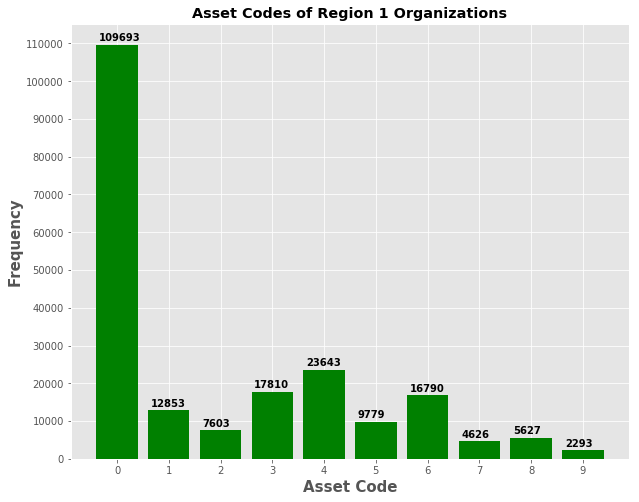

In [139]:
# Asset Code Bar Graph
p = irs_db.groupby("ASSET_CD").size()
freq = []
for i in p:
    freq.append(i)
fig,ax = plt.subplots(figsize = (10,8))
ax.bar(np.arange(10),freq, color = "g");
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(0,110001,10000))
ax.set_title("Asset Codes of Region 1 Organizations", weight = "bold")
ax.set_xlabel("Asset Code", fontsize=15, weight = "bold")
ax.set_ylabel("Frequency", fontsize=15, weight = "bold")

for i, v in enumerate(freq):
    ax.text(i-0.35,v+1000, str(v), weight = "bold")
    
